In [26]:
import pandas as pd

# labels.csv dosyasını oku
df = pd.read_csv('../dataset/labels.csv')

# İlk 10 kaydı görüntüle
print(df['image'].head(10))

0    0.jpeg
1    1.jpeg
2    2.jpeg
3    3.jpeg
4    4.jpeg
5    5.jpeg
6    6.jpeg
7    7.jpeg
8    8.jpeg
9    9.jpeg
Name: image, dtype: object


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. labels.csv dosyasını oku
df = pd.read_csv('../dataset/labels.csv')

# 2. Veri setini eğitim ve doğrulama olarak ayır
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42
)

print(f"✅ Eğitim verisi: {len(train_df)} kayıt")
print(f"✅ Doğrulama verisi: {len(val_df)} kayıt")

✅ Eğitim verisi: 1275 kayıt
✅ Doğrulama verisi: 319 kayıt


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Eğitim için veri artırımı
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Tüm pixel değerlerini 0-1 arasına normalize eder
    rotation_range=20,          # Rastgele döndürme
    width_shift_range=0.2,      # Yatay kaydırma
    height_shift_range=0.2,     # Dikey kaydırma
    shear_range=0.2,            # Kesme (shear)
    zoom_range=0.2,             # Zoom
    horizontal_flip=True,       # Yatay çevirme
    fill_mode='nearest'         # Boş kalan pikselleri doldurma
)

# Doğrulama için veri artırımı yok, sadece normalize ediyoruz
val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [36]:
# Eğitim veri akışı
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='../dataset/images',   
    x_col='image',                   
    y_col='classes',    # liste [] yok, sadece 'classes'
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',   
    shuffle=True
)

# Doğrulama veri akışı
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='../dataset/images',
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1275 validated image filenames belonging to 8 classes.
Found 319 validated image filenames belonging to 8 classes.


In [38]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# VGG16'yi yükle (ImageNet ağırlıkları ile)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Tüm katmanları dondur
for layer in base_model.layers:
    layer.trainable = False

# Kendi katmanlarımızı ekleyelim
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Çıkış katmanı: Çoklu etiket (multilabel) için sigmoid kullanıyoruz
predictions = Dense(8, activation='sigmoid')(x)

# Modeli tanımla
model = Model(inputs=base_model.input, outputs=predictions)

# Modeli derle
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',     # Multilabel için binary_crossentropy!
    metrics=['accuracy']
)

print("✅ Model başarıyla oluşturuldu ve derlendi.")

✅ Model başarıyla oluşturuldu ve derlendi.


C:\Users\Leopard\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1320 - loss: 0.6816
Epoch 1: val_loss improved from inf to 0.38574, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.1330 - loss: 0.6788 - val_accuracy: 0.3448 - val_loss: 0.3857
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3057 - loss: 0.3871
Epoch 2: val_loss improved from 0.38574 to 0.34309, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3061 - loss: 0.3868 - val_accuracy: 0.3417 - val_loss: 0.3431
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3501 - loss: 0.3561
Epoch 3: val_loss improved from 0.34309 to 0.33517, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3499 - loss: 0.3561 - val_accuracy: 0.3417 - val_loss: 0.3352
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3664 - loss: 0.3444
Epoch 4: val_loss improved from 0.33517 to 0.32805, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3661 - loss: 0.3444 - val_accuracy: 0.3448 - val_loss: 0.3280
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3675 - loss: 0.3357
Epoch 5: val_loss improved from 0.32805 to 0.32105, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3675 - loss: 0.3357 - val_accuracy: 0.3511 - val_loss: 0.3210
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3914 - loss: 0.3268
Epoch 6: val_loss improved from 0.32105 to 0.31415, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3912 - loss: 0.3270 - val_accuracy: 0.3793 - val_loss: 0.3141
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3799 - loss: 0.3242
Epoch 7: val_loss improved from 0.31415 to 0.30936, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3800 - loss: 0.3242 - val_accuracy: 0.3793 - val_loss: 0.3094
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4300 - loss: 0.3125
Epoch 8: val_loss improved from 0.30936 to 0.30313, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.4294 - loss: 0.3127 - val_accuracy: 0.4107 - val_loss: 0.3031
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4391 - loss: 0.3052
Epoch 9: val_loss improved from 0.30313 to 0.29824, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.4382 - loss: 0.3054 - val_accuracy: 0.4169 - val_loss: 0.2982
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4568 - loss: 0.2998
Epoch 10: val_loss improved from 0.29824 to 0.29370, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.4562 - loss: 0.2999 - val_accuracy: 0.4263 - val_loss: 0.2937
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4481 - loss: 0.3020
Epoch 11: val_loss improved from 0.29370 to 0.28982, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.4477 - loss: 0.3021 - val_accuracy: 0.4357 - val_loss: 0.2898
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4158 - loss: 0.3028
Epoch 12: val_loss improved from 0.28982 to 0.28533, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.4161 - loss: 0.3028 - val_accuracy: 0.4514 - val_loss: 0.2853
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4451 - loss: 0.2937
Epoch 13: val_loss improved from 0.28533 to 0.28085, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.4449 - loss: 0.2937 - val_accuracy: 0.5016 - val_loss: 0.2808
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4443 - loss: 0.2966
Epoch 14: val_loss improved from 0.28085 to 0.27746, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.4447 - loss: 0.2966 - val_accuracy: 0.4859 - val_loss: 0.2775
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4653 - loss: 0.2912
Epoch 15: val_loss improved from 0.27746 to 0.27455, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.4654 - loss: 0.2912 - val_accuracy: 0.4984 - val_loss: 0.2746
Epoch 16/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4453 - loss: 0.2942
Epoch 16: val_loss improved from 0.27455 to 0.27205, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.4459 - loss: 0.2940 - val_accuracy: 0.4953 - val_loss: 0.2720
Epoch 17/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5090 - loss: 0.2758
Epoch 17: val_loss improved from 0.27205 to 0.26870, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5085 - loss: 0.2758 - val_accuracy: 0.5110 - val_loss: 0.2687
Epoch 18/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4661 - loss: 0.2825
Epoch 18: val_loss improved from 0.26870 to 0.26551, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.4664 - loss: 0.2825 - val_accuracy: 0.5298 - val_loss: 0.2655
Epoch 19/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4911 - loss: 0.2741
Epoch 19: val_loss improved from 0.26551 to 0.26295, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.4910 - loss: 0.2742 - val_accuracy: 0.5361 - val_loss: 0.2629
Epoch 20/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5262 - loss: 0.2631
Epoch 20: val_loss improved from 0.26295 to 0.26003, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5256 - loss: 0.2634 - val_accuracy: 0.5705 - val_loss: 0.2600
Epoch 21/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5072 - loss: 0.2797
Epoch 21: val_loss improved from 0.26003 to 0.25890, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5072 - loss: 0.2796 - val_accuracy: 0.5486 - val_loss: 0.2589
Epoch 22/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5223 - loss: 0.2657
Epoch 22: val_loss improved from 0.25890 to 0.25574, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5223 - loss: 0.2658 - val_accuracy: 0.5705 - val_loss: 0.2557
Epoch 23/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5172 - loss: 0.2690
Epoch 23: val_loss improved from 0.25574 to 0.25354, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5174 - loss: 0.2690 - val_accuracy: 0.5737 - val_loss: 0.2535
Epoch 24/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5265 - loss: 0.2669
Epoch 24: val_loss improved from 0.25354 to 0.25190, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5265 - loss: 0.2668 - val_accuracy: 0.5893 - val_loss: 0.2519
Epoch 25/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5201 - loss: 0.2726
Epoch 25: val_loss improved from 0.25190 to 0.24994, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5202 - loss: 0.2725 - val_accuracy: 0.5831 - val_loss: 0.2499
Epoch 26/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5518 - loss: 0.2567
Epoch 26: val_loss improved from 0.24994 to 0.24713, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5516 - loss: 0.2568 - val_accuracy: 0.5925 - val_loss: 0.2471
Epoch 27/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5399 - loss: 0.2596
Epoch 27: val_loss improved from 0.24713 to 0.24567, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5400 - loss: 0.2596 - val_accuracy: 0.5956 - val_loss: 0.2457
Epoch 28/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5100 - loss: 0.2651
Epoch 28: val_loss improved from 0.24567 to 0.24458, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5106 - loss: 0.2650 - val_accuracy: 0.5893 - val_loss: 0.2446
Epoch 29/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5466 - loss: 0.2581
Epoch 29: val_loss improved from 0.24458 to 0.24311, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5467 - loss: 0.2580 - val_accuracy: 0.5925 - val_loss: 0.2431
Epoch 30/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5514 - loss: 0.2563
Epoch 30: val_loss improved from 0.24311 to 0.24080, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5518 - loss: 0.2562 - val_accuracy: 0.6019 - val_loss: 0.2408
Epoch 31/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5722 - loss: 0.2522
Epoch 31: val_loss improved from 0.24080 to 0.23881, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5724 - loss: 0.2521 - val_accuracy: 0.5987 - val_loss: 0.2388
Epoch 32/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5539 - loss: 0.2515
Epoch 32: val_loss improved from 0.23881 to 0.23637, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5539 - loss: 0.2515 - val_accuracy: 0.6050 - val_loss: 0.2364
Epoch 33/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6009 - loss: 0.2461
Epoch 33: val_loss improved from 0.23637 to 0.23636, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6008 - loss: 0.2461 - val_accuracy: 0.6144 - val_loss: 0.2364
Epoch 34/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5651 - loss: 0.2481
Epoch 34: val_loss improved from 0.23636 to 0.23350, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5654 - loss: 0.2480 - val_accuracy: 0.6144 - val_loss: 0.2335
Epoch 35/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5507 - loss: 0.2509
Epoch 35: val_loss improved from 0.23350 to 0.23339, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5514 - loss: 0.2507 - val_accuracy: 0.6144 - val_loss: 0.2334
Epoch 36/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5718 - loss: 0.2461
Epoch 36: val_loss improved from 0.23339 to 0.23117, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5721 - loss: 0.2461 - val_accuracy: 0.6238 - val_loss: 0.2312
Epoch 37/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5840 - loss: 0.2443
Epoch 37: val_loss improved from 0.23117 to 0.23080, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5839 - loss: 0.2442 - val_accuracy: 0.6082 - val_loss: 0.2308
Epoch 38/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6033 - loss: 0.2399
Epoch 38: val_loss improved from 0.23080 to 0.22850, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6030 - loss: 0.2399 - val_accuracy: 0.6238 - val_loss: 0.2285
Epoch 39/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5933 - loss: 0.2426
Epoch 39: val_loss improved from 0.22850 to 0.22725, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5933 - loss: 0.2424 - val_accuracy: 0.6270 - val_loss: 0.2272
Epoch 40/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6148 - loss: 0.2346
Epoch 40: val_loss improved from 0.22725 to 0.22623, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6147 - loss: 0.2346 - val_accuracy: 0.6301 - val_loss: 0.2262
Epoch 41/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6068 - loss: 0.2357
Epoch 41: val_loss improved from 0.22623 to 0.22533, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6068 - loss: 0.2357 - val_accuracy: 0.6207 - val_loss: 0.2253
Epoch 42/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6098 - loss: 0.2353
Epoch 42: val_loss improved from 0.22533 to 0.22455, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6098 - loss: 0.2354 - val_accuracy: 0.6301 - val_loss: 0.2246
Epoch 43/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6054 - loss: 0.2326
Epoch 43: val_loss improved from 0.22455 to 0.22324, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6054 - loss: 0.2326 - val_accuracy: 0.6176 - val_loss: 0.2232
Epoch 44/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6234 - loss: 0.2347
Epoch 44: val_loss improved from 0.22324 to 0.22132, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6236 - loss: 0.2347 - val_accuracy: 0.6332 - val_loss: 0.2213
Epoch 45/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5970 - loss: 0.2301
Epoch 45: val_loss improved from 0.22132 to 0.22039, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5973 - loss: 0.2302 - val_accuracy: 0.6364 - val_loss: 0.2204
Epoch 46/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6257 - loss: 0.2310
Epoch 46: val_loss improved from 0.22039 to 0.21984, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6257 - loss: 0.2310 - val_accuracy: 0.6364 - val_loss: 0.2198
Epoch 47/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6324 - loss: 0.2282
Epoch 47: val_loss improved from 0.21984 to 0.21844, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6320 - loss: 0.2283 - val_accuracy: 0.6489 - val_loss: 0.2184
Epoch 48/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6231 - loss: 0.2261
Epoch 48: val_loss improved from 0.21844 to 0.21768, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6231 - loss: 0.2261 - val_accuracy: 0.6489 - val_loss: 0.2177
Epoch 49/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6399 - loss: 0.2258
Epoch 49: val_loss improved from 0.21768 to 0.21724, saving model to ../model/vgg16_car_damage_multilabel.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6397 - loss: 0.2259 - val_accuracy: 0.6458 - val_loss: 0.2172
Epoch 50/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6206 - loss: 0.2306
Epoch 50: val_loss did not improve from 0.21724
40/40 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.6210 - loss: 0.2304 - val_accuracy: 0.6426 - val_loss: 0.2175
✅ Eğitim tamamlandı ve model kaydedildi.


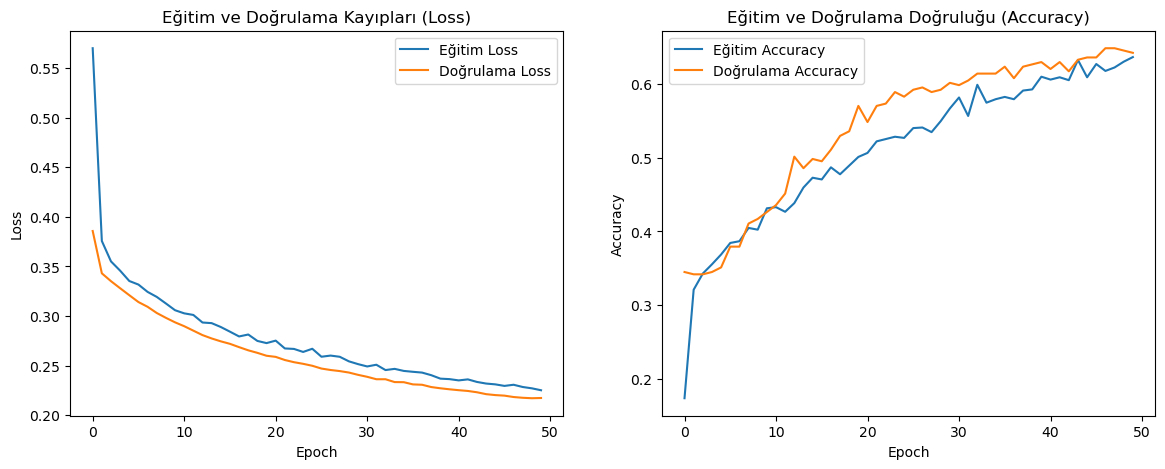

10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# --- ModelCheckpoint --- #
checkpoint = ModelCheckpoint(
    '../model/vgg16_car_damage_multilabel.h5',   
    monitor='val_loss',                          
    save_best_only=True,
    verbose=1
)

# --- Modeli eğit --- #
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,                       
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint]
)

print("✅ Eğitim tamamlandı ve model kaydedildi.")

# --- Eğitim Sonrası Grafikler --- #
# Loss ve Accuracy grafiklerini çizelim
plt.figure(figsize=(14,5))

# Loss grafiği
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Eğitim Loss')
plt.plot(history.history['val_loss'], label='Doğrulama Loss')
plt.title('Eğitim ve Doğrulama Kayıpları (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiği
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Eğitim Accuracy')
plt.plot(history.history['val_accuracy'], label='Doğrulama Accuracy')
plt.title('Eğitim ve Doğrulama Doğruluğu (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# --- Confusion Matrix (opsiyonel) --- #
# Validation datasında gerçek değerler ve tahminler alalım
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
preds = (preds > 0.5).astype(int)

true_labels = val_generator.labels

# Confusion Matrix çizelim (etiketler çoklu olduğu için multilabel confusion matrix kullanıyoruz)
mcm = multilabel_confusion_matrix(true_labels, preds)

# İstersen sadece ilk sınıfın confusion matrix'ini gösterelim (örnek)
fig, ax = plt.subplots(figsize=(5,5))
disp = ConfusionMatrixDisplay(confusion_matrix=mcm[0])
disp.plot(ax=ax)
plt.title('Örnek Sınıf için Confusion Matrix')
plt.show()

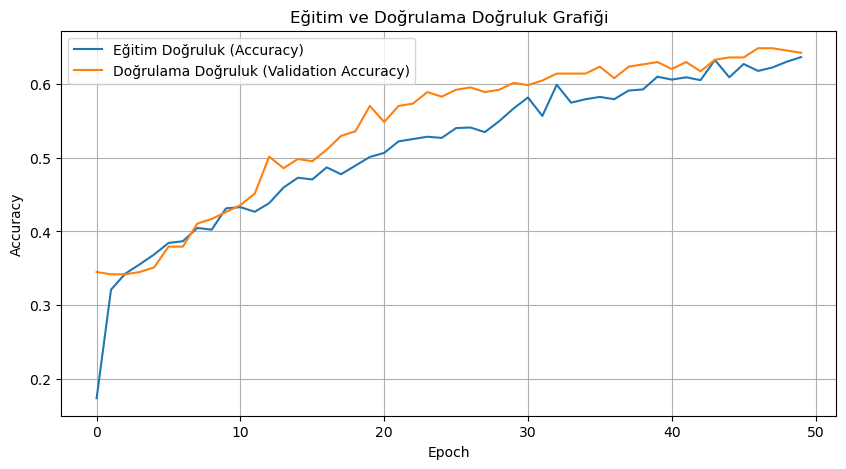

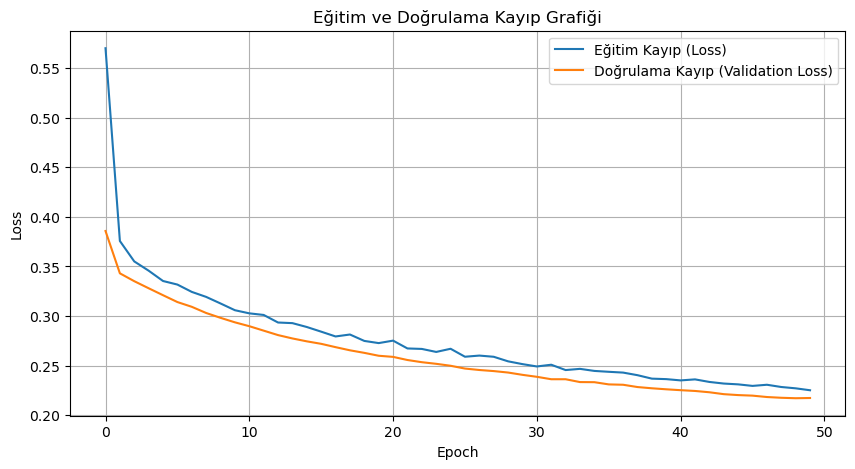

In [42]:
import matplotlib.pyplot as plt

# Accuracy Grafiği
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluk (Accuracy)')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluk (Validation Accuracy)')
plt.title('Eğitim ve Doğrulama Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Grafiği
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Eğitim Kayıp (Loss)')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıp (Validation Loss)')
plt.title('Eğitim ve Doğrulama Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, classification_report

# Tüm doğrulama verisini sıfırlayalım
val_generator.reset()

# Gerçek ve tahmin edilen etiketleri toplayalım
y_true = []
y_pred = []

for i in range(len(val_generator)):
    x_batch, y_batch = val_generator[i]
    preds = model.predict(x_batch)
    
    y_true.append(y_batch)
    y_pred.append(preds)

# Hepsini birleştir
y_true = np.vstack(y_true)
y_pred = np.vstack(y_pred)

# Tahminleri binaryye çevir
y_pred_binary = (y_pred > 0.5).astype(int)

# Sınıf isimleri
class_labels = list(val_generator.class_indices.keys())

# Şimdi multilabel confusion matrix
for idx, label in enumerate(class_labels):
    print(f"Confusion Matrix for class: {label}")
    print(multilabel_confusion_matrix(y_true[:, idx], y_pred_binary[:, idx])[1])
    print("\n")

# Ve genel Classification Report
print("\n--- Ayrıntılı Sınıflandırma Raporu (Classification Report) ---\n")
print(classification_report(y_true, y_pred_binary, target_names=class_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Confusion Matrix for class: bumper_dent
[[290   0]
 [ 28   1]]


Confusion Matrix for class: bumper_scratch
[[289   2]
 [ 26   2]]


Confusion Matrix for class: door_dent
[[278   2]
 [ 38   1]]


Confusion Matrix for class: door_scratch
[[286   1]
 [ 29   3]]


Confusion Matrix for class: glass_shatter
[[293   0]
 [ 22   4]]


Confusion Matrix for class: head_lamp
[[293   3]
 [ 20   3]]


Confusion Matrix for class: tail_lamp
[[283   3]
 [ 17  16]]


Confusion Matrix for class: unknown
[[191  19]
 [ 20  89]]



--- Ayrıntılı Sınıflandırma Raporu (Classification Report) ---

                precision    recall  f1-score   support

  

C:\Users\Leopard\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
# ---------------- Eğitim Sonrası Değerlendirme ---------------- #

import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("\n✅ Eğitim tamamlandı ve şimdi doğrulama setinde performansı ölçüyoruz...\n")

# Doğrulama veri üretecini sıfırla
val_generator.reset()

# Gerçek etiketleri ve tahminleri topla
y_true = []
y_pred = []

for i in range(len(val_generator)):
    x_batch, y_batch = val_generator[i]
    preds = model.predict(x_batch)
    
    y_true.append(y_batch)
    y_pred.append(preds)

# Hepsini birleştir
y_true = np.vstack(y_true)
y_pred = np.vstack(y_pred)

# Sigmoid çıktıyı binary (0-1) hale getir
y_pred_binary = (y_pred > 0.5).astype(int)

# Sınıf isimlerini al
class_labels = list(val_generator.class_indices.keys())

# Her sınıf için Confusion Matrix bastıralım
for idx, label in enumerate(class_labels):
    print(f"Confusion Matrix for class: {label}")
    cm = multilabel_confusion_matrix(y_true[:, idx], y_pred_binary[:, idx])[1]
    print(cm)
    print("\n")

# Ayrıntılı Sınıflandırma Raporu
print("\n--- Ayrıntılı Sınıflandırma Raporu (Classification Report) ---\n")
print(classification_report(y_true, y_pred_binary, target_names=class_labels))


✅ Eğitim tamamlandı ve şimdi doğrulama setinde performansı ölçüyoruz...

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Confusion Matrix for class: bumper_dent
[[290   0]
 [ 28   1]]


Confusion Matrix for class: bumper_scratch
[[289   2]
 [ 26   2]]


Confusion Matrix for class: door_dent
[[278   2]
 [ 38   1]]


Confusion Matrix for class: door_scratch
[[286   1]
 [ 29   3]]


Confusion Matrix for class: glass_shatter
[[293   0]
 [ 22   4]]


Confusion Matrix for class: head_lamp
[[293   3]
 [ 20   3]]


Confusion Matrix for class: tail_lamp
[[283   3]
 [ 17  16]]


Confusion Matrix for class: unknown
[[191  19]
 [ 20  89]]



--- Ayrıntılı Sınıflandırma Raporu (Classificatio

C:\Users\Leopard\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


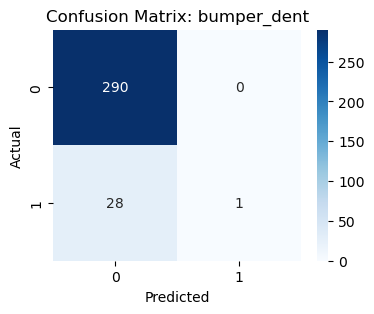

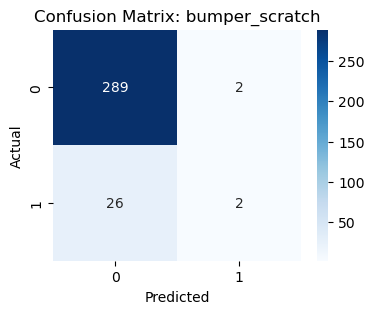

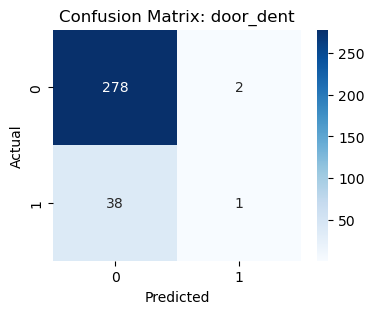

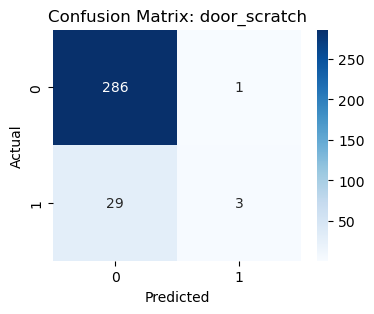

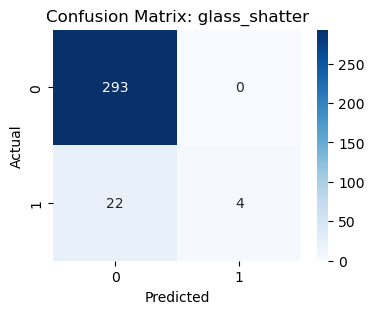

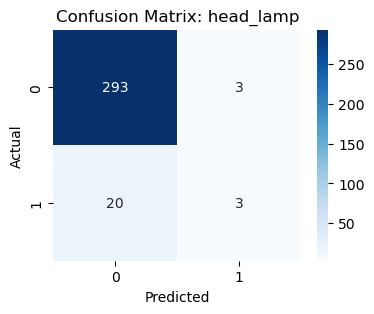

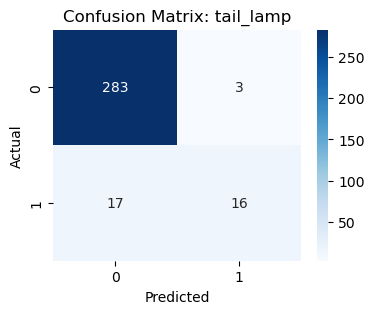

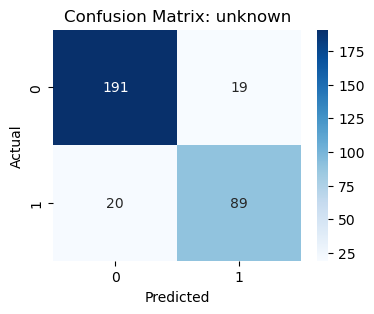

In [50]:
# Her sınıf için Confusion Matrix'i görselleştir
for idx, label in enumerate(class_labels):
    cm = multilabel_confusion_matrix(y_true[:, idx], y_pred_binary[:, idx])[1]
    
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {label}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()